### Imports

In [104]:
# This lesson only runs in jupyter, not lab

In [5]:
! pip install imageio

     |████████████████████████████████| 3.3 MB 5.0 MB/s eta 0:00:01


In [1]:
import geoplot as gplt

In [21]:
import geopandas as gpd

In [14]:
import geoplot.crs as gcrs

In [6]:
import imageio

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import mapclassify as mc

In [10]:
%matplotlib inline

In [11]:
# Geospatial data uses shape files (.shp)
# It uses geometric shapes as a feature. File looks 
# like a df. Every shape file is like a vector. 
# Column gives true shape of observation.
# Need a map and base map.

In [38]:
usa = gpd.read_file("./cb_2018_us_state_20m/cb_2018_us_state_20m.shp")

In [39]:
usa.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS          NAME LSAD  \
0      24  01714934  0400000US24    24     MD      Maryland   00   
1      19  01779785  0400000US19    19     IA          Iowa   00   
2      10  01779781  0400000US10    10     DE      Delaware   00   
3      39  01085497  0400000US39    39     OH          Ohio   00   
4      42  01779798  0400000US42    42     PA  Pennsylvania   00   

          ALAND       AWATER  \
0   25151100280   6979966958   
1  144661267977   1084180812   
2    5045925646   1399985648   
3  105828882568  10268850702   
4  115884442321   3394589990   

                                            geometry  
0  MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...  
1  POLYGON ((-96.62187 42.77925, -96.57794 42.827...  
2  POLYGON ((-75.77379 39.72220, -75.75323 39.757...  
3  MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...  
4  POLYGON ((-80.51989 40.90666, -80.51964 40.987...

In [40]:
state_pop = pd.read_csv('./nst-est2018-alldata.csv')

In [41]:
for i in state_pop.columns:
    print(i)

SUMLEV
REGION
DIVISION
STATE
NAME
CENSUS2010POP
ESTIMATESBASE2010
POPESTIMATE2010
POPESTIMATE2011
POPESTIMATE2012
POPESTIMATE2013
POPESTIMATE2014
POPESTIMATE2015
POPESTIMATE2016
POPESTIMATE2017
POPESTIMATE2018
NPOPCHG_2010
NPOPCHG_2011
NPOPCHG_2012
NPOPCHG_2013
NPOPCHG_2014
NPOPCHG_2015
NPOPCHG_2016
NPOPCHG_2017
NPOPCHG_2018
BIRTHS2010
BIRTHS2011
BIRTHS2012
BIRTHS2013
BIRTHS2014
BIRTHS2015
BIRTHS2016
BIRTHS2017
BIRTHS2018
DEATHS2010
DEATHS2011
DEATHS2012
DEATHS2013
DEATHS2014
DEATHS2015
DEATHS2016
DEATHS2017
DEATHS2018
NATURALINC2010
NATURALINC2011
NATURALINC2012
NATURALINC2013
NATURALINC2014
NATURALINC2015
NATURALINC2016
NATURALINC2017
NATURALINC2018
INTERNATIONALMIG2010
INTERNATIONALMIG2011
INTERNATIONALMIG2012
INTERNATIONALMIG2013
INTERNATIONALMIG2014
INTERNATIONALMIG2015
INTERNATIONALMIG2016
INTERNATIONALMIG2017
INTERNATIONALMIG2018
DOMESTICMIG2010
DOMESTICMIG2011
DOMESTICMIG2012
DOMESTICMIG2013
DOMESTICMIG2014
DOMESTICMIG2015
DOMESTICMIG2016
DOMESTICMIG2017
DOMESTICMIG2018
NETMIG2

In [30]:
# Combining dataframes

In [46]:
geo_data_full_df = usa.merge(state_pop, left_on='NAME', right_on='NAME')

In [47]:
geo_data_full_df.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS          NAME LSAD  \
0      24  01714934  0400000US24    24     MD      Maryland   00   
1      19  01779785  0400000US19    19     IA          Iowa   00   
2      10  01779781  0400000US10    10     DE      Delaware   00   
3      39  01085497  0400000US39    39     OH          Ohio   00   
4      42  01779798  0400000US42    42     PA  Pennsylvania   00   

          ALAND       AWATER  \
0   25151100280   6979966958   
1  144661267977   1084180812   
2    5045925646   1399985648   
3  105828882568  10268850702   
4  115884442321   3394589990   

                                            geometry  ...  RDOMESTICMIG2017  \
0  MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...  ...         -3.991992   
1  POLYGON ((-96.62187 42.77925, -96.57794 42.827...  ...         -1.278002   
2  POLYGON ((-75.77379 39.72220, -75.75323 39.757...  ...          4.689728   
3  MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...  ...         -0.698138   
4  POLYGON ((-80.51989 40.90666, -80.51964 40.987...  ...         -2.144836   

  RDOMESTICMIG2018 RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  \
0        -4.063440    3.600733     3.315179     1.775836     1.160255   
1        -0.916222    1.843768    -0.120479     2.359797     1.925327   
2         7.127976    4.801565     4.910826     6.209397     6.493793   
3        -1.040184   -1.999325    -1.820990     0.365060    -0.030544   
4        -1.598828    1.516750     0.547598    -0.023724    -0.133225   

   RNETMIG2015  RNETMIG2016  RNETMIG2017  RNETMIG2018  
0     0.315784    -1.352135    -0.208652    -0.322019  
1     0.702299     0.036461     0.573348     0.934001  
2     6.755571     5.516683     6.460703     9.019623  
3    -0.494039    -0.313424     0.968963     0.716636  
4    -0.921843    -0.952470     0.302260     1.165270  

[5 rows x 145 columns]

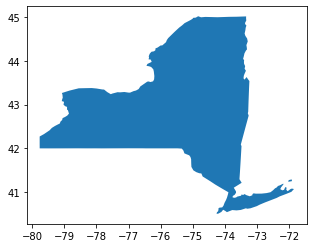

In [54]:
geo_data_full_df[geo_data_full_df['NAME'] == 'New York'].plot();

In [55]:
gplt.datasets.get_path('contiguous_usa')

'https://raw.githubusercontent.com/ResidentMario/geoplot-data/master/contiguous-usa.geojson'

In [56]:
path = gplt.datasets.get_path('contiguous_usa')

In [58]:
lower_48 = gpd.read_file(path)

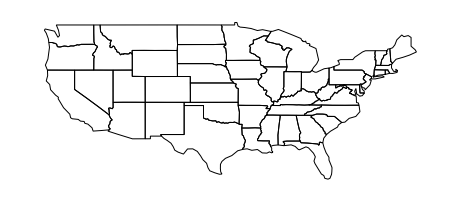

In [60]:
gplt.polyplot(lower_48);

In [62]:
cities_path = gplt.datasets.get_path('usa_cities')

In [63]:
usa_cities = gpd.read_file(cities_path)

In [64]:
lower_48_cities = usa_cities.query("STATE not in ['HI', 'AK', 'PR']")

In [65]:
lower_48_cities

id   POP_2010  ELEV_IN_FT STATE                     geometry
0        53    40888.0      1611.0    ND  POINT (-101.29627 48.23251)
1       101    52838.0       830.0    ND   POINT (-97.03285 47.92526)
2       153    15427.0      1407.0    ND   POINT (-98.70844 46.91054)
3       177   105549.0       902.0    ND   POINT (-96.78980 46.87719)
4       192    17787.0      2411.0    ND  POINT (-102.78962 46.87918)
...     ...        ...         ...   ...                          ...
3661  38128  2565635.0        49.0    NY   POINT (-73.94956 40.65009)
3662  38129  2272771.0        39.0    NY   POINT (-73.79745 40.75016)
3663  38130   470728.0       164.0    NY   POINT (-74.14981 40.58328)
3664  38138    28712.0       187.0    MA   POINT (-71.33303 41.98405)
3665  38149    84439.0        10.0    FL   POINT (-80.29498 26.16730)

[3616 rows x 5 columns]

In [66]:
# Notice how geometry feature is a point now. Was polygon in previous.

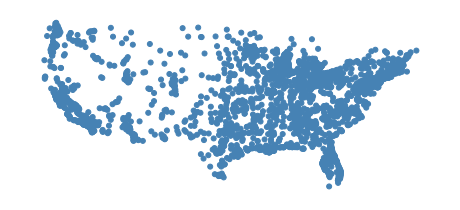

In [68]:
gplt.pointplot(lower_48_cities);

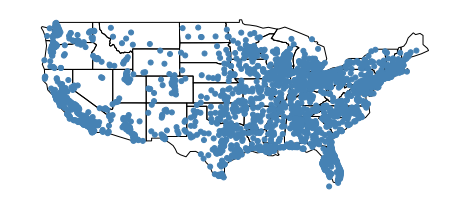

In [69]:
ax = gplt.polyplot(lower_48) #base map set as background
gplt.pointplot(lower_48_cities, ax = ax);

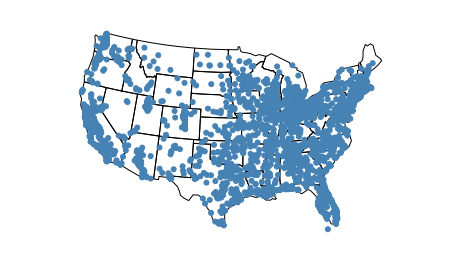

In [70]:
# Cities layer is more stretched out, so let's specify projection
ax = gplt.polyplot(lower_48, projection=gcrs.AlbersEqualArea()) 
gplt.pointplot(lower_48_cities, ax = ax);

In [71]:
# Much less stretched out.

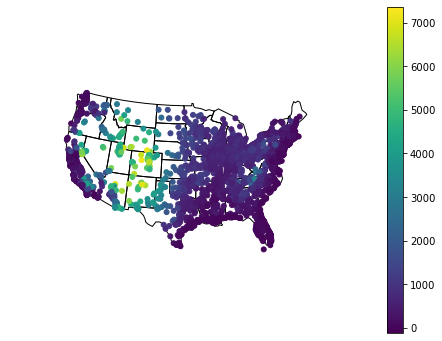

In [74]:
ax = gplt.polyplot(lower_48, projection=gcrs.AlbersEqualArea())
gplt.pointplot(
    lower_48_cities,
    ax = ax,
    hue="ELEV_IN_FT", #Using column from lower_48 df
    legend=True
);

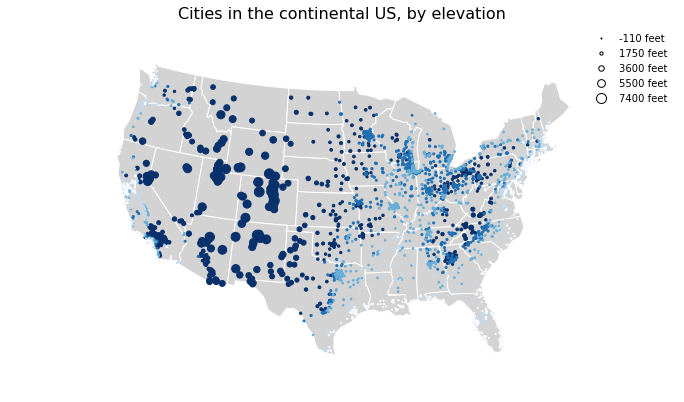

In [76]:
ax = gplt.polyplot(
  lower_48,
  edgecolor="white",
  facecolor="lightgray",
  figsize=(12, 8),
  projection=gcrs.AlbersEqualArea()
)

gplt.pointplot(
  lower_48_cities,
  ax=ax,
  hue="ELEV_IN_FT",
  cmap="Blues",
  scheme="quantiles",
  scale="ELEV_IN_FT",
  limits=(1, 10),
  legend=True,
  legend_var="scale",
  legend_kwargs={"frameon": False},
  legend_values=[-110, 1750, 3600, 5500, 7400],
  legend_labels=["-110 feet", "1750 feet", "3600 feet", "5500 feet", "7400 feet"]
)

ax.set_title("Cities in the continental US, by elevation", fontsize=16);

In [77]:
# Changing state colors

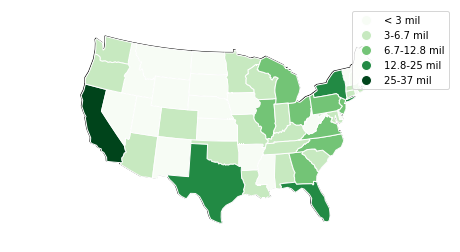

In [82]:
ax = gplt.polyplot(lower_48, projection=gcrs.AlbersEqualArea())

gplt.choropleth(
    lower_48,
    hue="population",
    edgecolor="white",
    linewidth=1,
    cmap="Greens",
    legend=True,
    scheme="FisherJenks",
    legend_labels=["< 3 mil", "3-6.7 mil", "6.7-12.8 mil", "12.8-25 mil", "25-37 mil"],
    projection=gcrs.AlbersEqualArea(),
    ax=ax
);

In [83]:
boroughs = gpd.read_file(gplt.datasets.get_path("nyc_boroughs"))

In [84]:
boroughs

BoroCode       BoroName    Shape_Leng    Shape_Area  \
0         5  Staten Island  330385.03697  1.623853e+09   
1         4         Queens  861038.47930  3.049947e+09   
2         3       Brooklyn  726568.94634  1.959432e+09   
3         1      Manhattan  358532.95642  6.364422e+08   
4         2          Bronx  464517.89055  1.186804e+09   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...  
2  MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...

In [85]:
collisions = gpd.read_file(gplt.datasets.get_path("nyc_collision_factors"))

In [86]:
collisions

id      ON STREET NAME  NUMBER OF MOTORIST KILLED  \
0         18      WORTMAN AVENUE                          0   
1         21       HUBERT STREET                          0   
2         69        HENRY STREET                          0   
3         80                None                          0   
4         85      BEDFORD AVENUE                          0   
...      ...                 ...                        ...   
7298  920212      EAST 11 STREET                          0   
7299  920217            4 AVENUE                          0   
7300  920263     SHORE BOULEVARD                          0   
7301  920286      WEST 38 STREET                          0   
7302  920292  SCHENECTADY AVENUE                          0   

      CONTRIBUTING FACTOR VEHICLE 3  NUMBER OF CYCLIST INJURED  LONGITUDE  \
0                              None                          0 -73.872007   
1                              None                          0 -74.008344   
2                              None                          0 -73.997563   
3     Failure to Yield Right-of-Way                          0 -73.854542   
4                              None                          0 -73.952731   
...                             ...                        ...        ...   
7298                           None                          0 -73.959113   
7299                           None                          0 -74.020772   
7300                           None                          0 -73.953836   
7301                           None                          0 -73.982723   
7302                           None                          0 -73.934391   

         OFF STREET NAME VEHICLE TYPE CODE 4   LATITUDE  \
0                   None                None  40.662514   
1                   None                None  40.721323   
2                   None                None  40.687999   
3     67-64 FLEET STREET                None  40.719228   
4                   None                None  40.632147   
...                  ...                 ...        ...   
7298                None                None  40.584305   
7299                None                None  40.638583   
7300                None                None  40.581744   
7301                None                None  40.750960   
7302                None                None  40.663604   

                       LOCATION  ... ZIP CODE  VEHICLE TYPE CODE 3  \
0     (40.6625139, -73.8720068)  ...  11208.0                 None   
1     (40.7213228, -74.0083444)  ...  10013.0                 None   
2     (40.6879989, -73.9975625)  ...  11201.0                 None   
3     (40.7192276, -73.8545422)  ...  11375.0    PASSENGER VEHICLE   
4     (40.6321467, -73.9527315)  ...  11210.0                 None   
...                         ...  ...      ...                  ...   
7298  (40.5843046, -73.9591125)  ...  11235.0                 None   
7299  (40.6385828, -74.0207721)  ...  11220.0                 None   
7300  (40.5817444, -73.9538363)  ...  11235.0                 None   
7301  (40.7509597, -73.9827227)  ...  10016.0                 None   
7302  (40.6636039, -73.9343912)  ...  11213.0                 None   

      NUMBER OF CYCLIST KILLED        DATE UNIQUE KEY  \
0                            0  11/10/2016    3559576   
1                            0  11/10/2016    3557391   
2                            0  04/16/2016    3419378   
3                            0  04/15/2016    3428072   
4                            0  04/15/2016    3417537   
...                        ...         ...        ...   
7298                         0  01/07/2016    3367113   
7299                         0  01/06/2016    3366075   
7300                         0  01/04/2016    3365285   
7301                         0  01/02/2016    3364048   
7302                         0  01/02/2016    3364205   

      CONTRIBUTING FACTOR VEHICLE 5 VEHICLE TYPE CODE 5      TIME  \
0                       

In [87]:
# Making kernel density plot

/Users/afsara/opt/anaconda3/envs/geopandas/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/afsara/opt/anaconda3/envs/geopandas/lib/python3.9/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


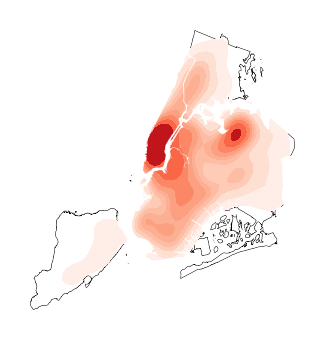

In [88]:
ax = gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea())

gplt.kdeplot(collisions, 
             cmap="Reds",
             shade=True,
             clip=boroughs,
             ax=ax);

In [90]:
# Most collisions near LaGuardia airport and Manhattan

In [92]:
# Plotting major cities together

/Users/afsara/opt/anaconda3/envs/geopandas/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/afsara/opt/anaconda3/envs/geopandas/lib/python3.9/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


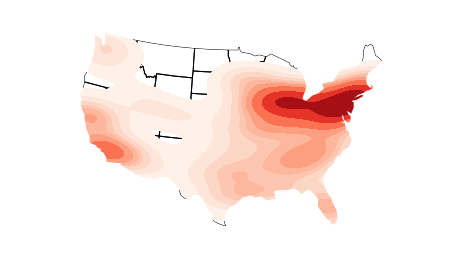

In [91]:
ax = gplt.polyplot(lower_48, projection=gcrs.AlbersEqualArea())
gplt.kdeplot(
    lower_48_cities,
    cmap="Reds",
    shade=True,
    clip=lower_48,
    ax=ax
);

In [93]:
obesity = pd.read_csv(gplt.datasets.get_path("obesity_by_state"), sep='\t')
obesity.head()

State  Percent
0   Alabama     32.4
1  Missouri     30.4
2    Alaska     28.4
3   Montana     24.6
4   Arizona     26.8

In [94]:
# Quick join
geo_obesity = lower_48.set_index("state").join(obesity.set_index("State"))
geo_obesity.head()

adm1_code  population  \
state                                
Minnesota     USA-3514     5303925   
Montana       USA-3515      989415   
North Dakota  USA-3516      672591   
Idaho         USA-3518     1567582   
Washington    USA-3519     6724540   

                                                       geometry  Percent  
state                                                                     
Minnesota     POLYGON ((-89.59941 48.01027, -89.48888 48.013...     25.5  
Montana       POLYGON ((-111.19419 44.56116, -111.29155 44.7...     24.6  
North Dakota  POLYGON ((-96.60136 46.35136, -96.53891 46.199...     31.0  
Idaho         POLYGON ((-111.04973 44.48816, -111.05025 42.0...     29.6  
Washington    POLYGON ((-116.99807 46.33017, -116.90653 46.1...     27.2

In [95]:
# Making a cartogram

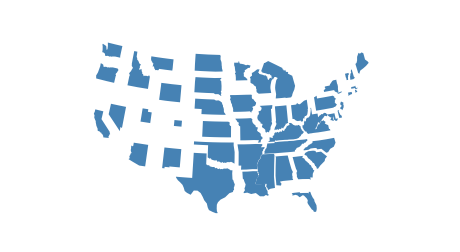

In [96]:
gplt.cartogram(
    geo_obesity,
    scale="Percent",
    projection=gcrs.AlbersEqualArea()
);

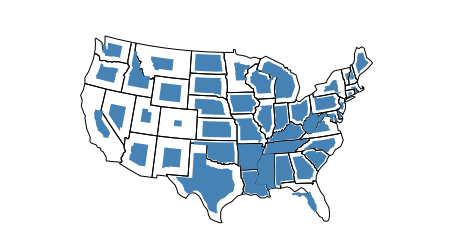

In [97]:
ax = gplt.polyplot(lower_48, projection=gcrs.AlbersEqualArea())
gplt.cartogram(
    geo_obesity,
    scale="Percent",
    projection=gcrs.AlbersEqualArea(),
    ax=ax
);

In [98]:
mc.Quantiles(lower_48_cities['ELEV_IN_FT'], k=10) #Have to input number of classes(k)

Quantiles                 

     Interval        Count
--------------------------
[-112.00,   26.00] |   382
(  26.00,   72.00] |   351
(  72.00,  157.00] |   362
( 157.00,  328.00] |   353
( 328.00,  528.00] |   366
( 528.00,  646.00] |   359
( 646.00,  778.00] |   359
( 778.00,  948.00] |   363
( 948.00, 1310.50] |   359
(1310.50, 7369.00] |   362

In [99]:
scheme = mc.Quantiles(lower_48_cities['ELEV_IN_FT'], k=10)

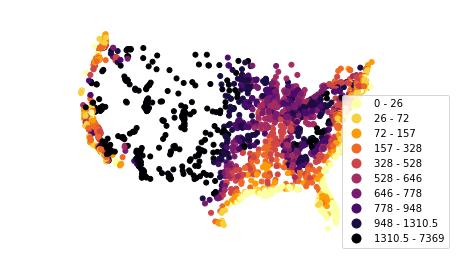

In [101]:
gplt.pointplot(
    lower_48_cities,
    projection=gcrs.AlbersEqualArea(),
    hue="ELEV_IN_FT",
    scheme=scheme,
    cmap="inferno_r",
    legend=True
);

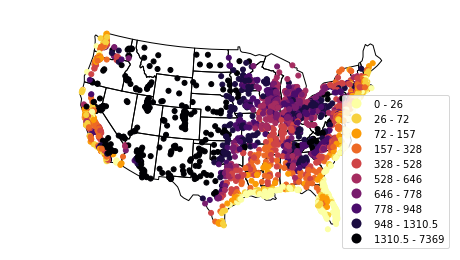

In [103]:
ax = gplt.polyplot(lower_48, projection=gcrs.AlbersEqualArea())

gplt.pointplot(
    lower_48_cities,
    projection=gcrs.AlbersEqualArea(),
    hue="ELEV_IN_FT",
    scheme=scheme,
    cmap="inferno_r",
    legend=True,
    ax=ax
);

In [106]:
import warnings
warnings.filterwarnings("ignore", "GeoSeries.isna", UserWarning)

In [ ]:
# 

In [107]:
melbourne = gpd.read_file(gplt.datasets.get_path("melbourne"))
df = gpd.read_file(gplt.datasets.get_path("melbourne_schools"))
melbourne_primary_schools = df.query('School_Type=="Primary"')

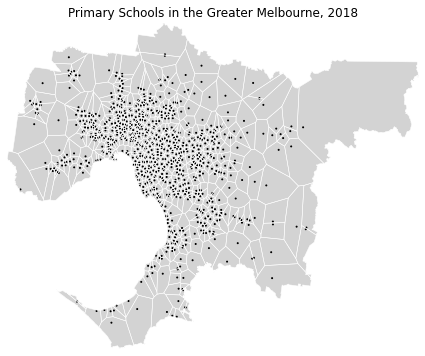

In [110]:
ax = gplt.voronoi(
    melbourne_primary_schools,
    clip=melbourne,
    linewidth=0.5,
    edgecolor="white",
    projection=gcrs.Mercator()
)

gplt.polyplot(
    melbourne,
    edgecolor="None",
    facecolor="lightgray",
    ax=ax
)

gplt.pointplot(
    melbourne_primary_schools,
    color="black",
    ax=ax,
    s=1,
    extent=melbourne.total_bounds
)

plt.title("Primary Schools in the Greater Melbourne, 2018");

In [111]:
# There is at least one primary school in each county/district.

In [112]:
proj = gcrs.AlbersEqualArea(
    central_longitude = -98,
    central_latitude = 39.5
)

In [ ]:
# This didn't work bc of voronoi
ax = gplt.voronoi(
  lower_48_cities,
  hue="ELEV_IN_FT",
  clip=lower_48,
  projection=proj,
  cmap="Reds",
  legend=True,
  edgecolor="white",
  linewidth=0.01
)

gplt.polyplot(
  lower_48,
  ax=ax,
  extent=lower_48.total_bounds,
  edgecolor="black",
  linewidth=1,
  zorder=1
);

In [ ]:
# Covid Data

In [122]:
ihme = pd.read_csv('./2021_08_04/worse_hospitalization_all_locs.csv')

In [123]:
ihme.columns

Index(['V1', 'location_name', 'date', 'location_id', 'deaths_data_type',
       'deaths_mean', 'deaths_lower', 'deaths_upper', 'totdea_mean',
       'totdea_lower', 'totdea_upper', 'deaths_mean_smoothed',
       'deaths_lower_smoothed', 'deaths_upper_smoothed',
       'totdea_mean_smoothed', 'totdea_lower_smoothed',
       'totdea_upper_smoothed', 'deaths_reported_mean',
       'deaths_reported_lower', 'deaths_reported_upper',
       'totdea_reported_mean', 'totdea_reported_lower',
       'totdea_reported_upper', 'deaths_reported_mean_smoothed',
       'deaths_reported_lower_smoothed', 'deaths_reported_upper_smoothed',
       'totdea_reported_mean_smoothed', 'totdea_reported_lower_smoothed',
       'totdea_reported_upper_smoothed', 'mobility_data_type',
       'mobility_composite', 'total_tests_data_type', 'total_tests',
       'confirmed_infections_data_type', 'confirmed_infections',
       'est_infections_data_type', 'est_infections_mean',
       'est_infections_lower', 'est_infectio

In [124]:
ihme.date

0         2020-02-04
1         2020-02-05
2         2020-02-06
3         2020-02-07
4         2020-02-08
             ...    
253110    2021-11-27
253111    2021-11-28
253112    2021-11-29
253113    2021-11-30
253114    2021-12-01
Name: date, Length: 253115, dtype: object

In [126]:
ihme[ihme['date'] == "2021-04-22"]

V1   location_name        date  location_id deaths_data_type  \
443        444         Abruzzo  2021-04-22        35507         observed   
1105      1106            Acre  2021-04-22         4750         observed   
1772      1773     Afghanistan  2021-04-22          160         observed   
2439      2440  Aguascalientes  2021-04-22         4643         observed   
3089      3090         Alabama  2021-04-22          523         observed   
...        ...             ...         ...          ...              ...   
250269  250270           Yemen  2021-04-22          157         observed   
250936  250937         Yucatán  2021-04-22         4673         observed   
251603  251604       Zacatecas  2021-04-22         4674         observed   
252248  252249          Zambia  2021-04-22          191         observed   
252891  252892        Zimbabwe  2021-04-22          198         observed   

        deaths_mean  deaths_lower  deaths_upper   totdea_mean  totdea_lower  \
443        8.000000           NaN           NaN   2355.000000           NaN   
1105       9.000000           NaN           NaN   1467.000000           NaN   
1772      15.835546           NaN           NaN  10138.708608           NaN   
2439       6.594723           NaN           NaN   5258.192369           NaN   
3089      35.936624           NaN           NaN  22881.060068           NaN   
...             ...           ...           ...           ...           ...   
250269    42.450654           NaN           NaN   4911.540719           NaN   
250936    10.972240           NaN           NaN   5191.241069           NaN   
251603    10.076613           NaN           NaN   7144.318830           NaN   
252248     5.968418           NaN           NaN   3700.419212           NaN   
252891     0.000000           NaN           NaN   5434.425193           NaN   

        ...  totdea_reported_mean_smoothed_p100k_rate  \
443     ...                                178.526614   
1105    ...                                157.613920   
1772    ...                                  6.664044   
2439    ...                                172.082274   
3089    ...                                216.532422   
...     ...                                       ...   
250269  ...                                  3.622590   
250936  ...                                172.972445   
251603  ...                                176.559060   
252248  ...                                  6.743088   
252891  ...                                 10.305737   

        totdea_reported_lower_smoothed_p100k_rate  \
443                                    178.526614   
1105                                   157.613920   
1772                                     6.664044   
2439                                   172.082274   
3089                                   216.532422   
...                                           ...   
250269                                   3.622590   
250936                                 172.972445   
251603                                 176.559060   
252248                                   6.743088   
252891                                  10.305737   

        totdea_reported_upper_smoothed_p100k_rate  \
443                                    178.526614   
1105                                   157.613920   
1772                                     6.664044   
2439                                   172.082274   
3089                                   216.532422   
...                                           ...   
250269                                   3.622590   
250936                                 172.972445   
251603                                 176.559060   
252248                                   6.743088   
252891                                  10.305737   

        confirmed_infections_p100k_rate  est_infections_mean_p100k_rate  \
443                           17.756248                             NaN   
1105                          35.944034  

In [127]:
is_earthday = ihme[ihme['date'] == "2021-04-22"]

In [129]:
lower_48.merge(is_earthday, left_on="state", right_on='location_name')

state adm1_code  population  \
0              Minnesota  USA-3514     5303925   
1                Montana  USA-3515      989415   
2           North Dakota  USA-3516      672591   
3                  Idaho  USA-3518     1567582   
4             Washington  USA-3519     6724540   
5                Arizona  USA-3520     6392017   
6             California  USA-3521    37253956   
7               Colorado  USA-3522     5029196   
8                 Nevada  USA-3523     2700551   
9             New Mexico  USA-3524     2059179   
10                Oregon  USA-3525     3831074   
11                  Utah  USA-3526     2763885   
12               Wyoming  USA-3527      563626   
13              Arkansas  USA-3528     2915918   
14                  Iowa  USA-3529     3046355   
15                Kansas  USA-3530     2853118   
16              Missouri  USA-3531     5988927   
17              Nebraska  USA-3532     1826341   
18              Oklahoma  USA-3533     3751351   
19          South Dakota  USA-3534      814180   
20             Louisiana  USA-3535     4533372   
21                 Texas  USA-3536    25145561   
22           Connecticut  USA-3537     3574097   
23         Massachusetts  USA-3513     6547629   
24         New Hampshire  USA-3538     1316470   
25          Rhode Island  USA-3539     1052567   
26               Vermont  USA-3540      625741   
27               Alabama  USA-3541     4779736   
28               Florida  USA-3542    18801310   
29               Georgia  USA-3543     9687653   
30               Georgia  USA-3543     9687653   
31           Mississippi  USA-3544     2967297   
32        South Carolina  USA-3545     4625364   
33              Illinois  USA-3546    12830632   
34               Indiana  USA-3547     6483802   
35              Kentucky  USA-3548     4339367   
36        North Carolina  USA-3549     9535483   
37                  Ohio  USA-3550    11536504   
38             Tennessee  USA-3551     6346105   
39              Virginia  USA-3552     8001024   
40             Wisconsin  USA-3553     5686986   
41         West Virginia  USA-3554     1852994   
42              Delaware  USA-3555      897934   
43  District of Columbia  USA-3556      601723   
44              Maryland  USA-3557     5773552   
45            New Jersey  USA-3558     8791894   
46              New York  USA-3559    19378102   
47          Pennsylvania  USA-3560    12702379   
48                 Maine  USA-3561     1328361   
49              Michigan  USA-3562     9883640   

                                             geometry      V1  \
0   POLYGON ((-89.59941 48.01027, -89.48888 48.013...  142138   
1   POLYGON ((-111.19419 44.56116, -111.29155 44.7...  144766   
2   POLYGON ((-96.60136 46.35136, -96.53891 46.199...  161123   
3   POLYGON ((-111.04973 44.48816, -111.05025 42.0...   99320   
4   POLYGON ((-116.99807 46.33017, -116.90653 46.1...  247001   
5   POLYGON ((-109.04523 36.99991, -109.04367 31.3...   12327   
6   POLYGON ((-114.35490 34.46467, -114.16597 34.2...   38068   
7   POLYGON ((-102.05017 40.00082, -102.04012 38.4...   52599   
8   POLYGON ((-114.03053 36.99410, -114.02363 36.1...  154566   
9   POLYGON ((-103.00161 33.87995, -103.00161 31.9...  156538   
10  POLYGON ((-117.02825 42.00002, -117.02825 41.9...  169751   
11  POLYGON ((-109.05318 41.00199, -109.04523 36.9...  238404   
12  POLYGON ((-111.06719 44.54160, -111.07141 45.0...  249634   
13  POLYGON ((-89.66292 36.02307, -89.67351 35.940...   12983   
14  POLYGON ((-90.15664 42.10374, -90.21007 41.834...  102626   
15  POLYGON ((-94.60481 39.13986, -94.61538 38.068...  111224   
16  POLYGON ((-94.61750 36.99991, -94.62280 36.999...  143446   
17  POLYGON ((-95.45254 40.21514, -95.32288 40.001...  152567   
18  POLYGON ((-94.62861 36.54059, -94.43017 35.483...  167754   
19  POLYGON ((-96.75427 42.63396, -97.02839 42.717...  214744   
20  POLYGON ((-89.21767 29.29108, -89.40839 29.159...  123075   
21  POLYGON ((-93.57824 31.21613, -93.

In [130]:
cv19 = lower_48.merge(is_earthday, left_on="state", right_on='location_name')

In [131]:
# Calculating deaths per mil. Creating new column too.
cv19['deaths_per_mil'] = (cv19["deaths_mean"] / cv19['population'] * 1_000_000)

In [133]:
cv19['deaths_per_mil'][:5]

0    2.257077
1    0.000000
2    0.000000
3    1.723188
4    1.440303
Name: deaths_per_mil, dtype: float64

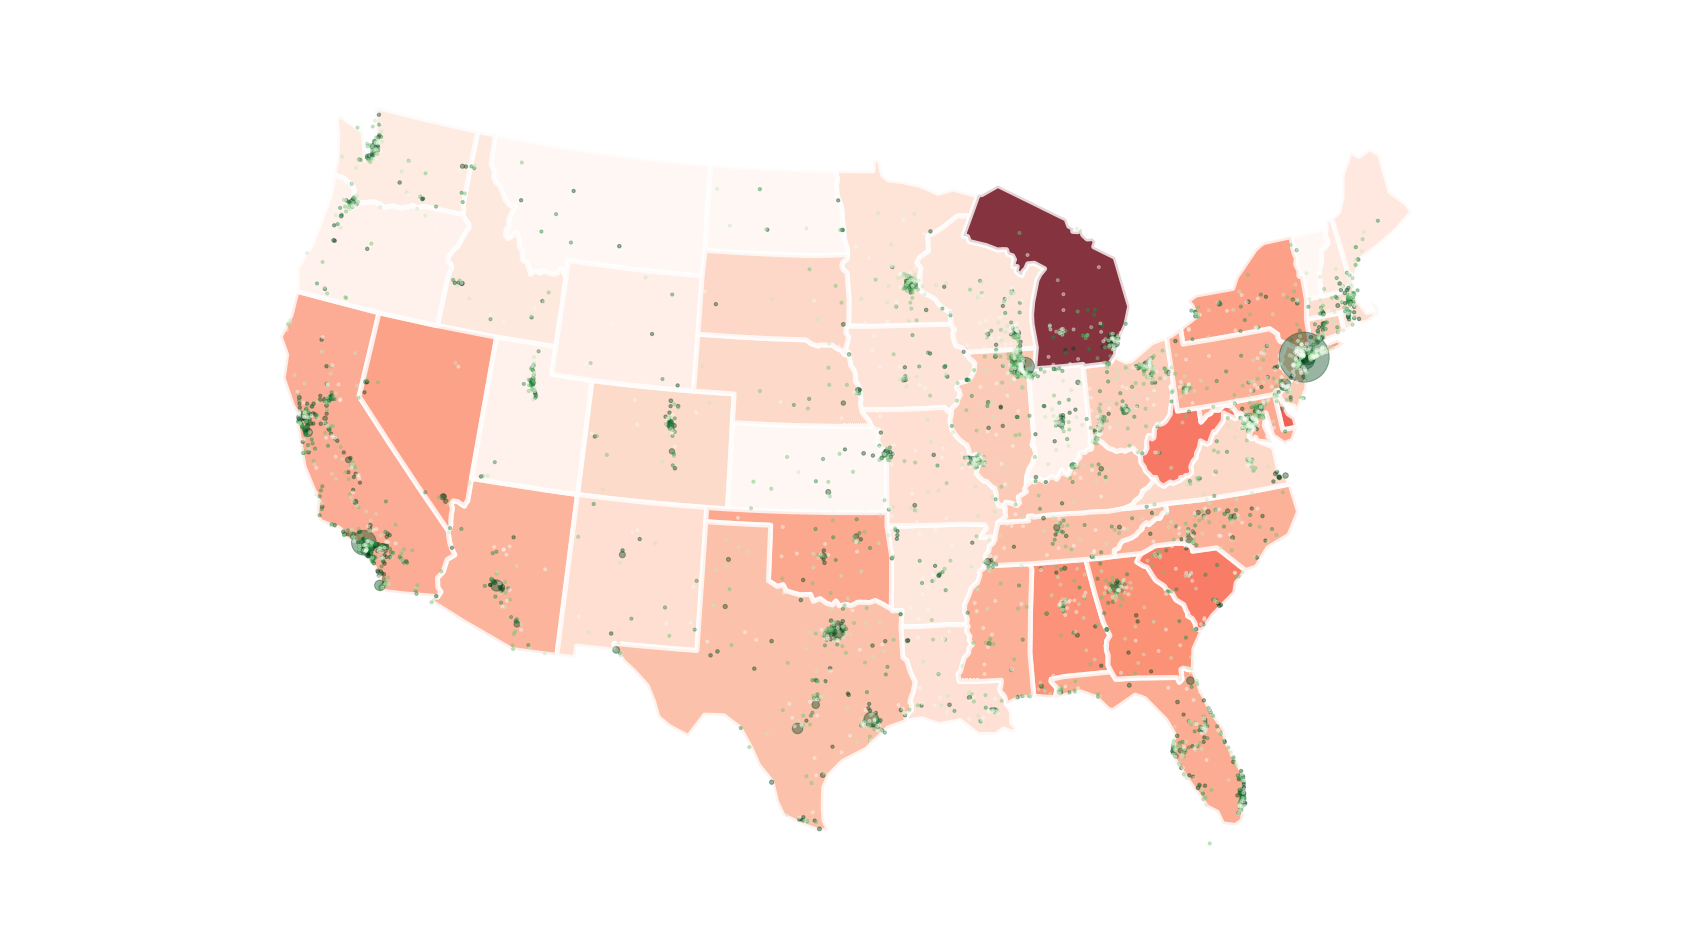

In [138]:
ax=gplt.choropleth(
    cv19,
    hue='deaths_per_mil',
    edgecolor="white",
    linewidth=5,
    cmap='Reds',
    alpha=0.8,
    projection=gcrs.AlbersEqualArea(),
    figsize=(30,30)
)

gplt.pointplot(
    lower_48_cities,
    hue='POP_2010',
    cmap="Greens",
    scheme='quantiles',
    scale='POP_2010',
    limits=(3,50),
    zorder=2,
    alpha=0.4,
    ax=ax
);

In [136]:
# As the city grows, hospitalizations via covid per capita increases.

In [139]:
import pathlib

In [140]:
def plot_choropleth(anim_path, date, cv19, cities):
    ax = gplt.choropleth(
        cv19,
        hue='deaths_per_mil',
        edgecolor='white',
        linewidth=5,
        cmap='Reds',
        alpha=0.8,
        projection=gcrs.AlbersEqualArea(),
        figsize=(30,30)
    )
    ax = gplt.pointplot(
        cities,
        hue='POP_2010',
        cmap='Greens',
        scheme='quantiles',
        scale='POP_2010',
        limits=(3,50),
        zorder=2,
        alpha=0.4,
        ax=ax
    )
    
    ax.set_title(
        f"COVID-19 deaths per million on {date}",
        fontsize=36
    )
    file_name = str(anim_path / "{}.png".format(date.replace("-", "")))
    plt.savefig(file_name, bbox_inches='tight', pad_inches=0.1)
    return file_name

anim_path = pathlib.Path("anim/")

In [152]:

date_set = set([])

for d in ihme['date'].tolist():
    if d >= "2020-03-23" and d <= "2020-04-01":
        date_set.add(d)

dates = sorted(list(date_set))

In [153]:
dates

['2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01']

<Figure size 432x288 with 0 Axes>

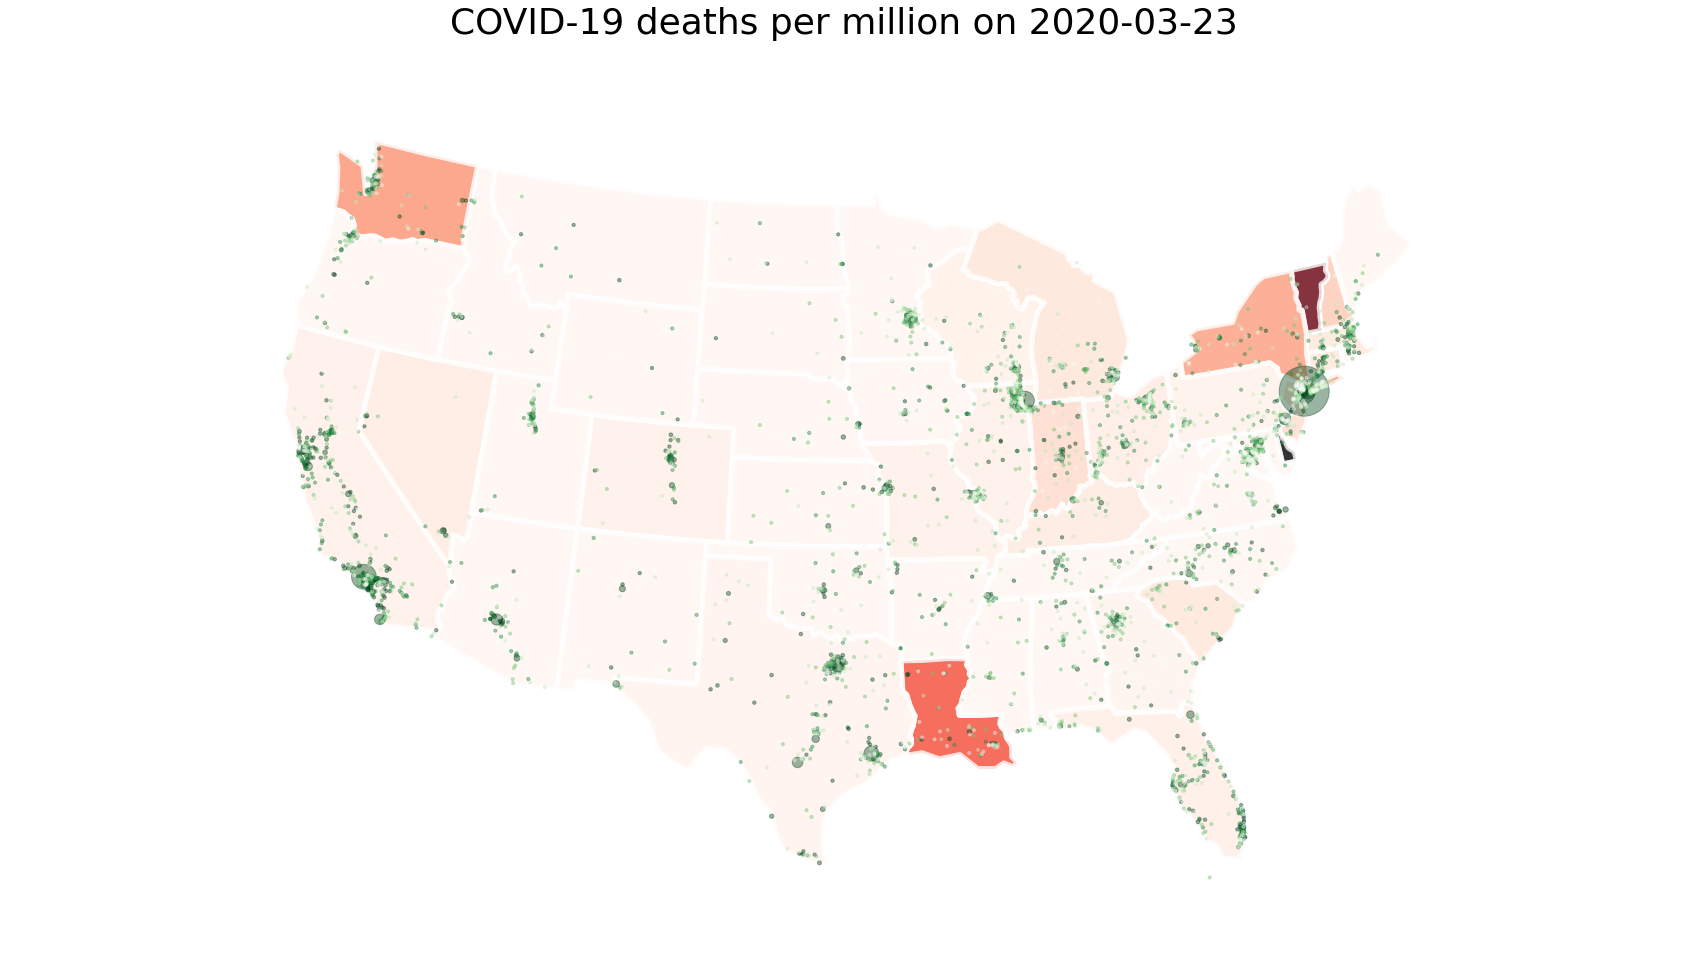

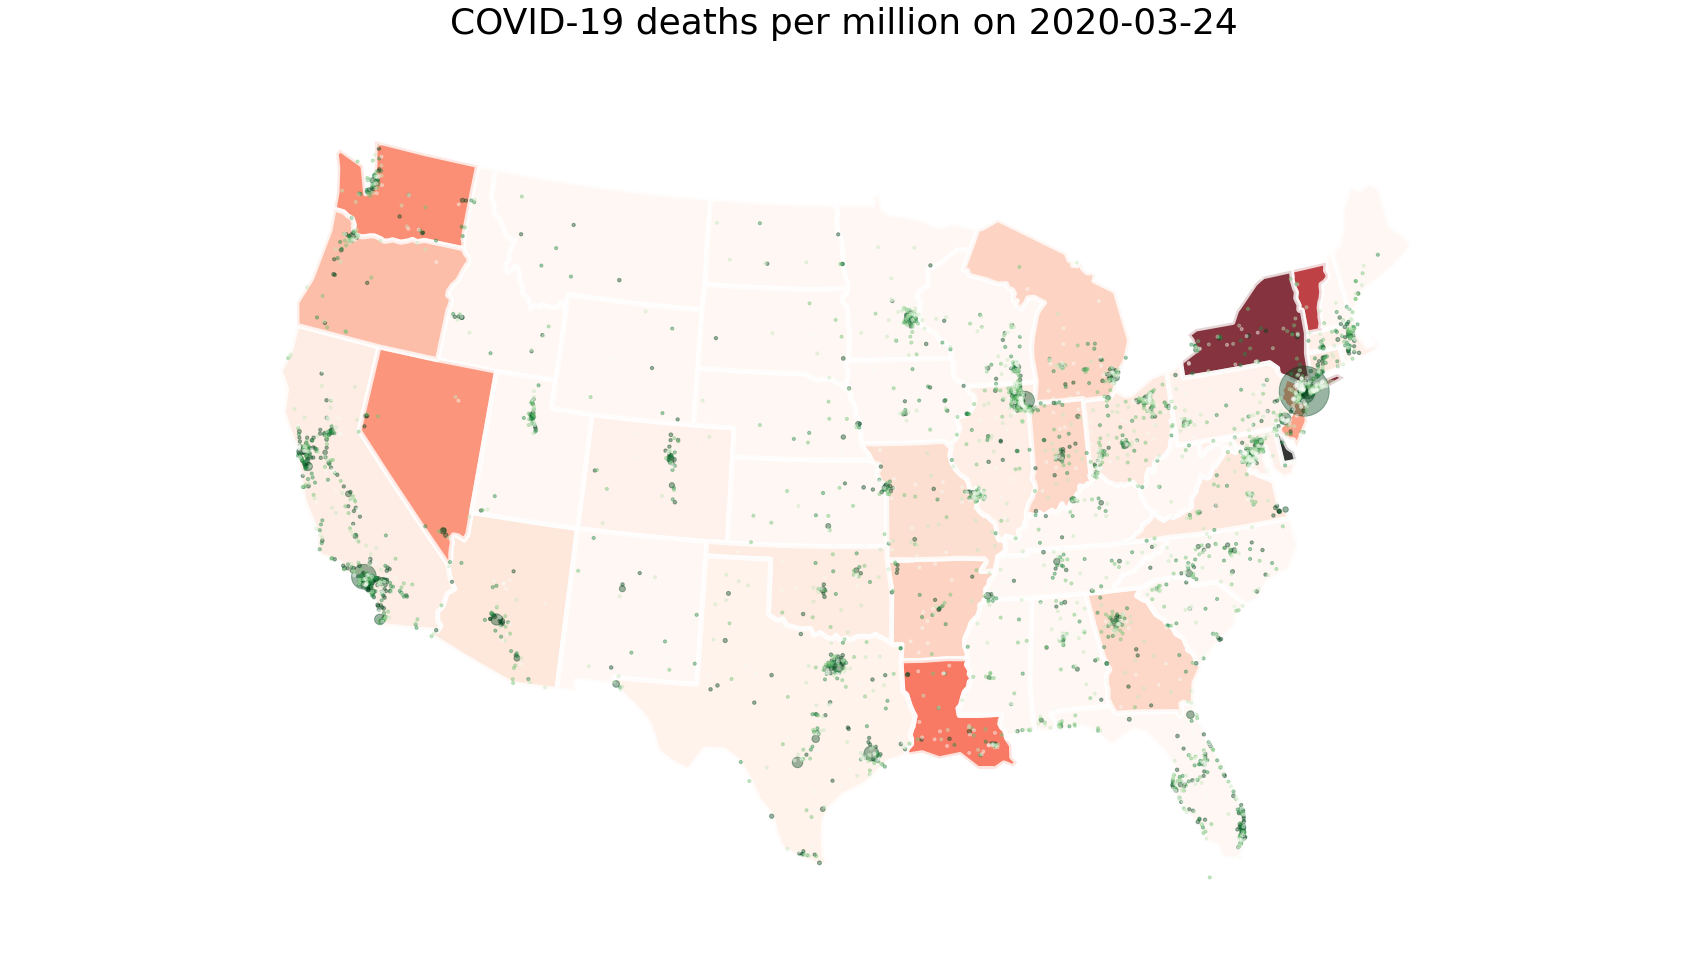

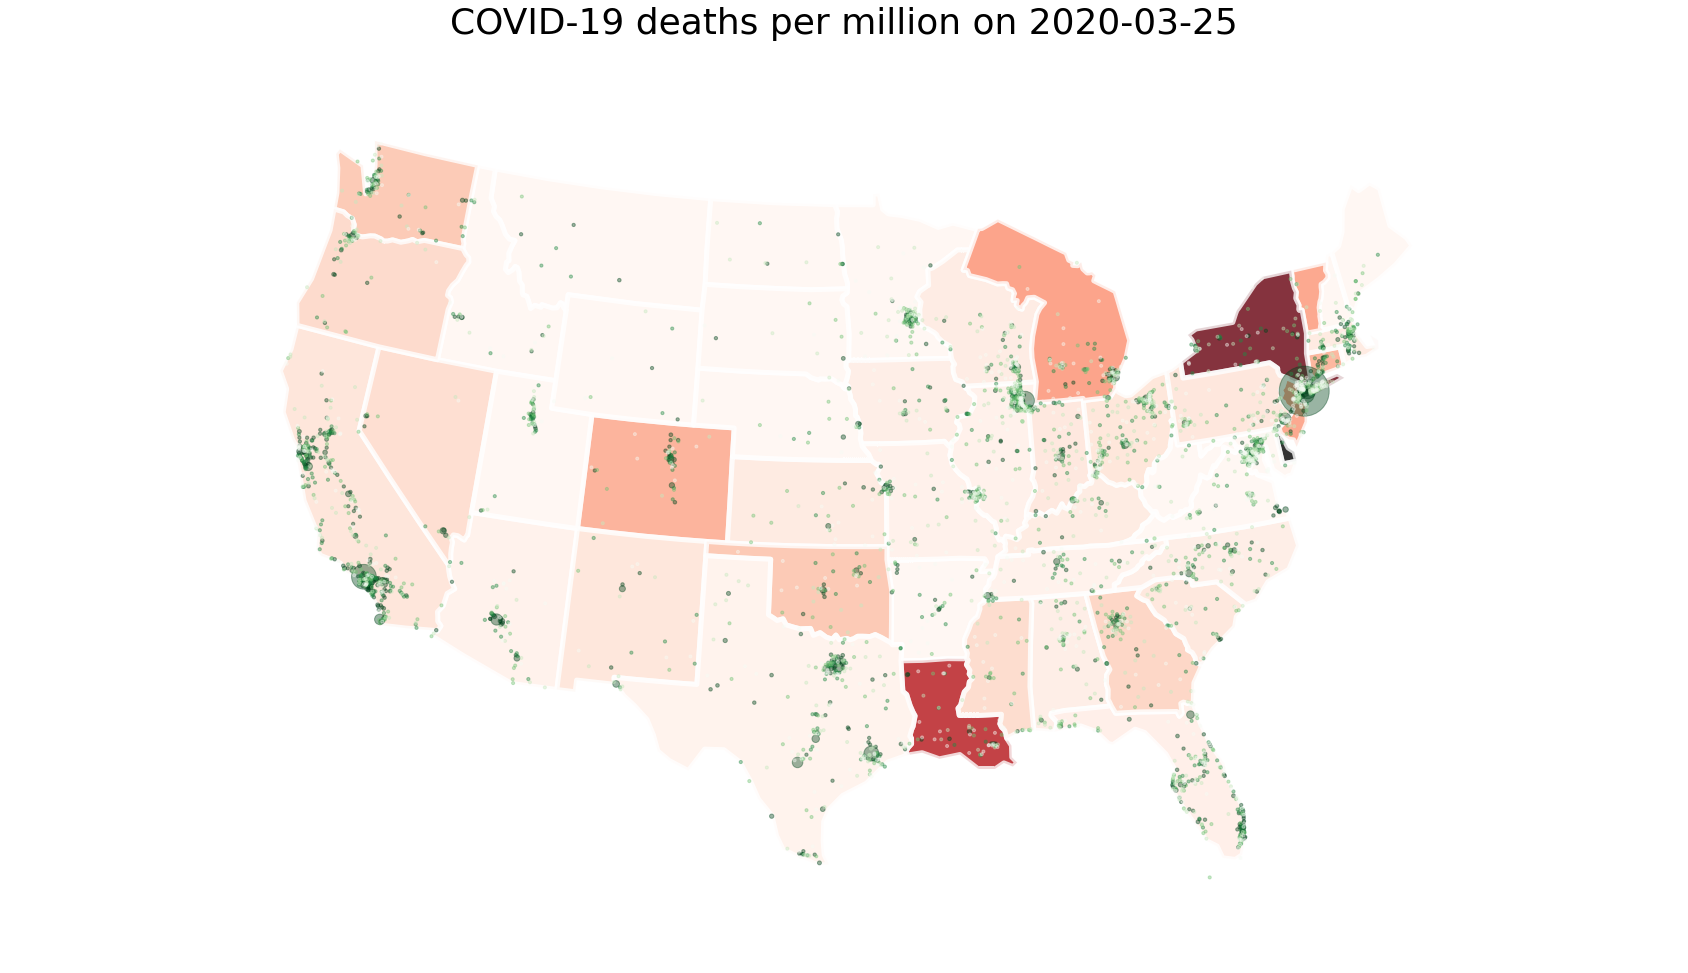

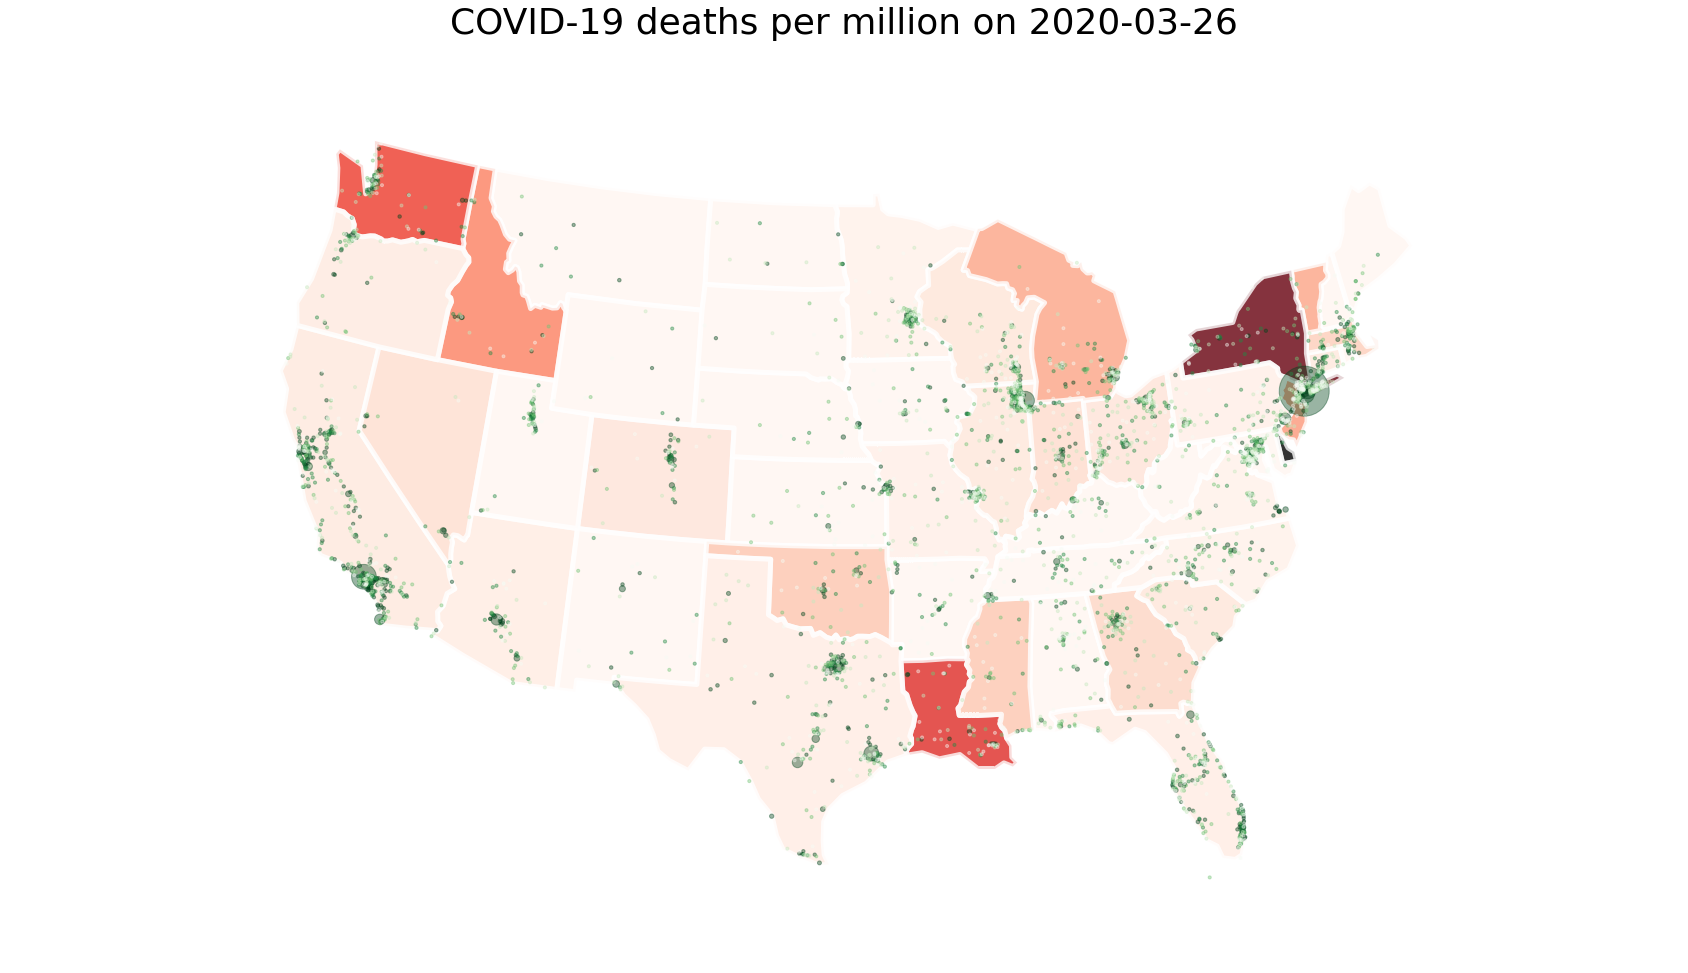

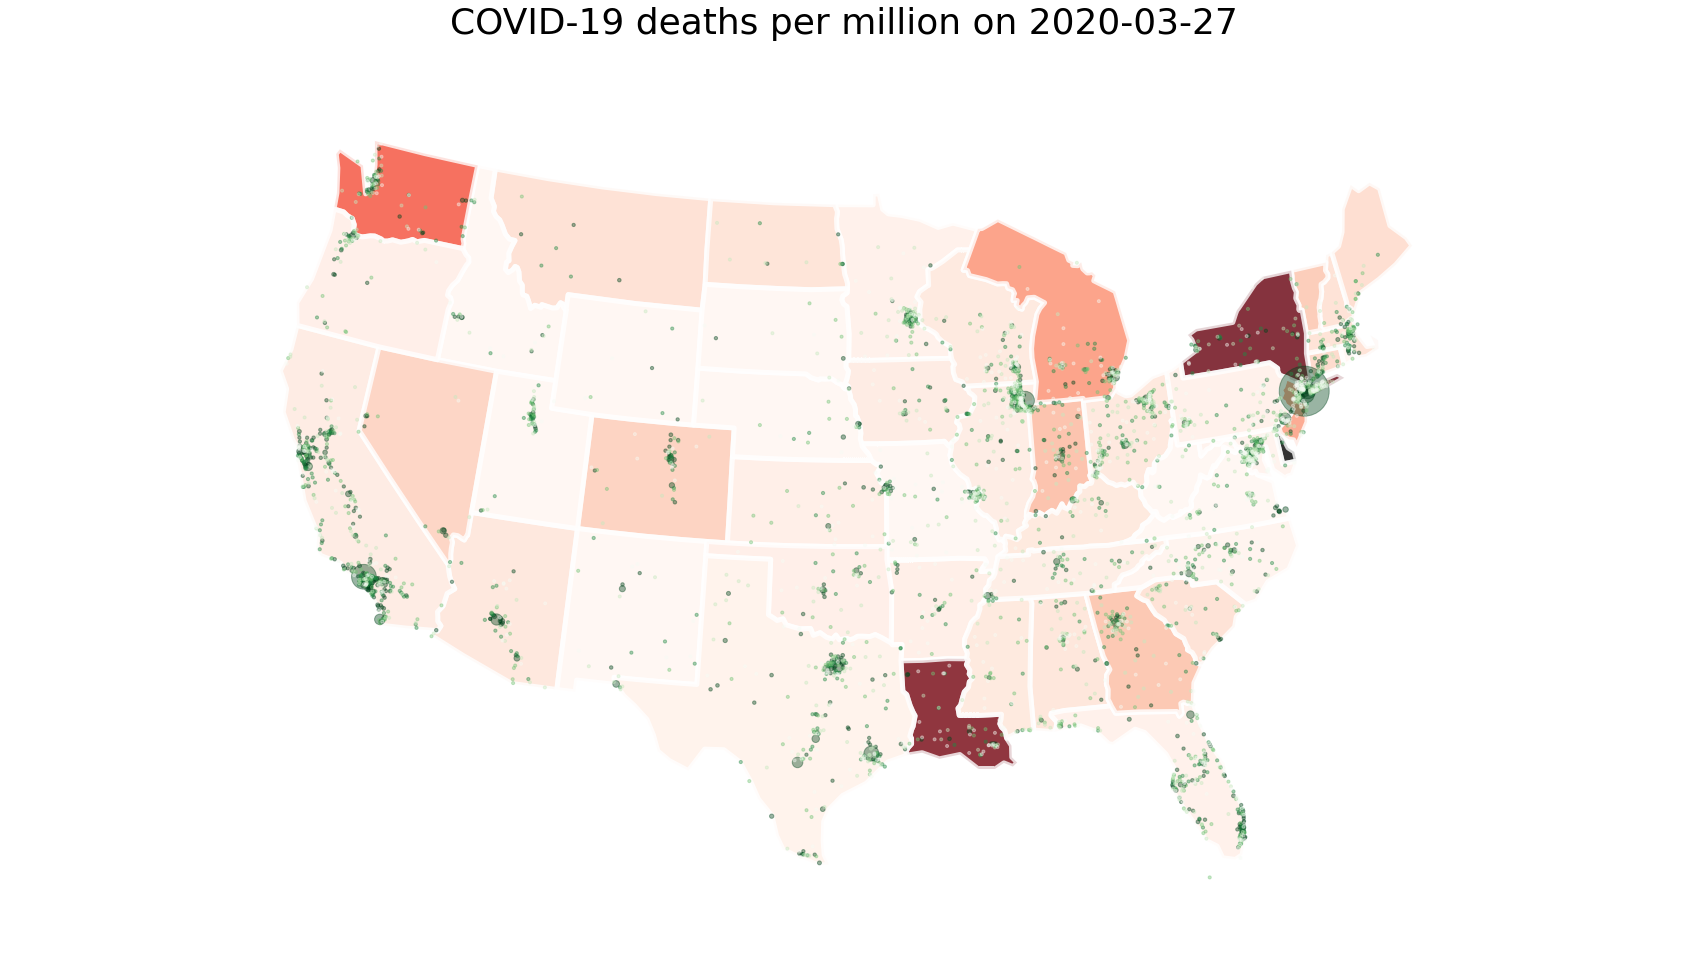

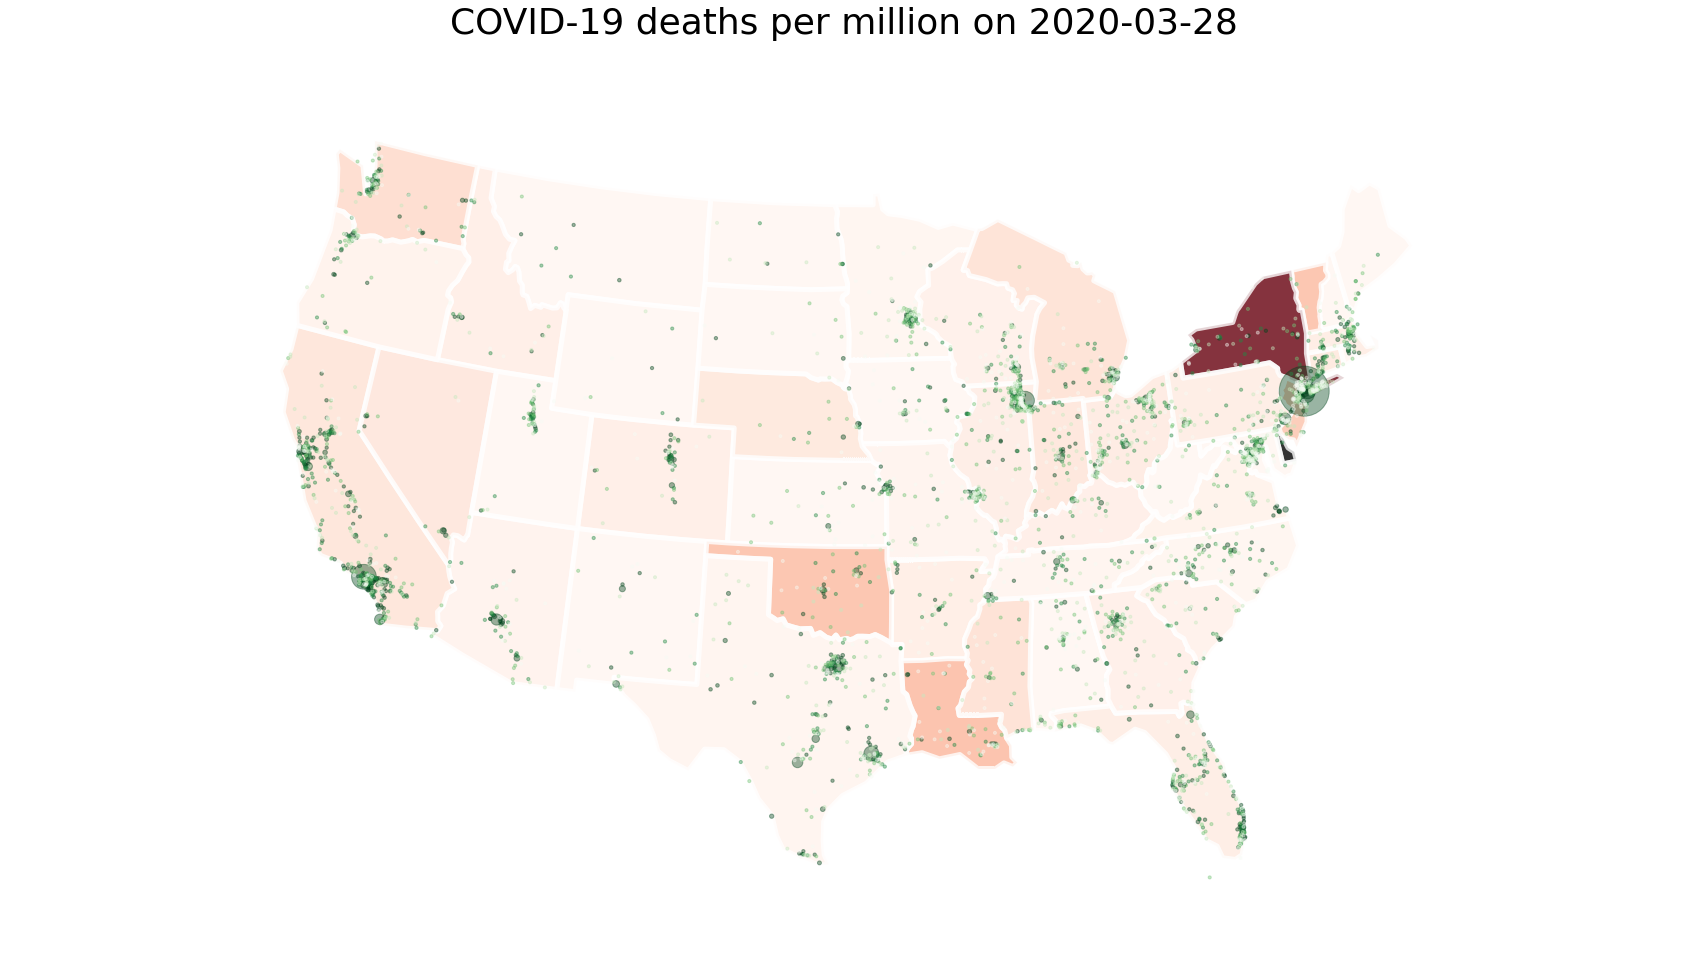

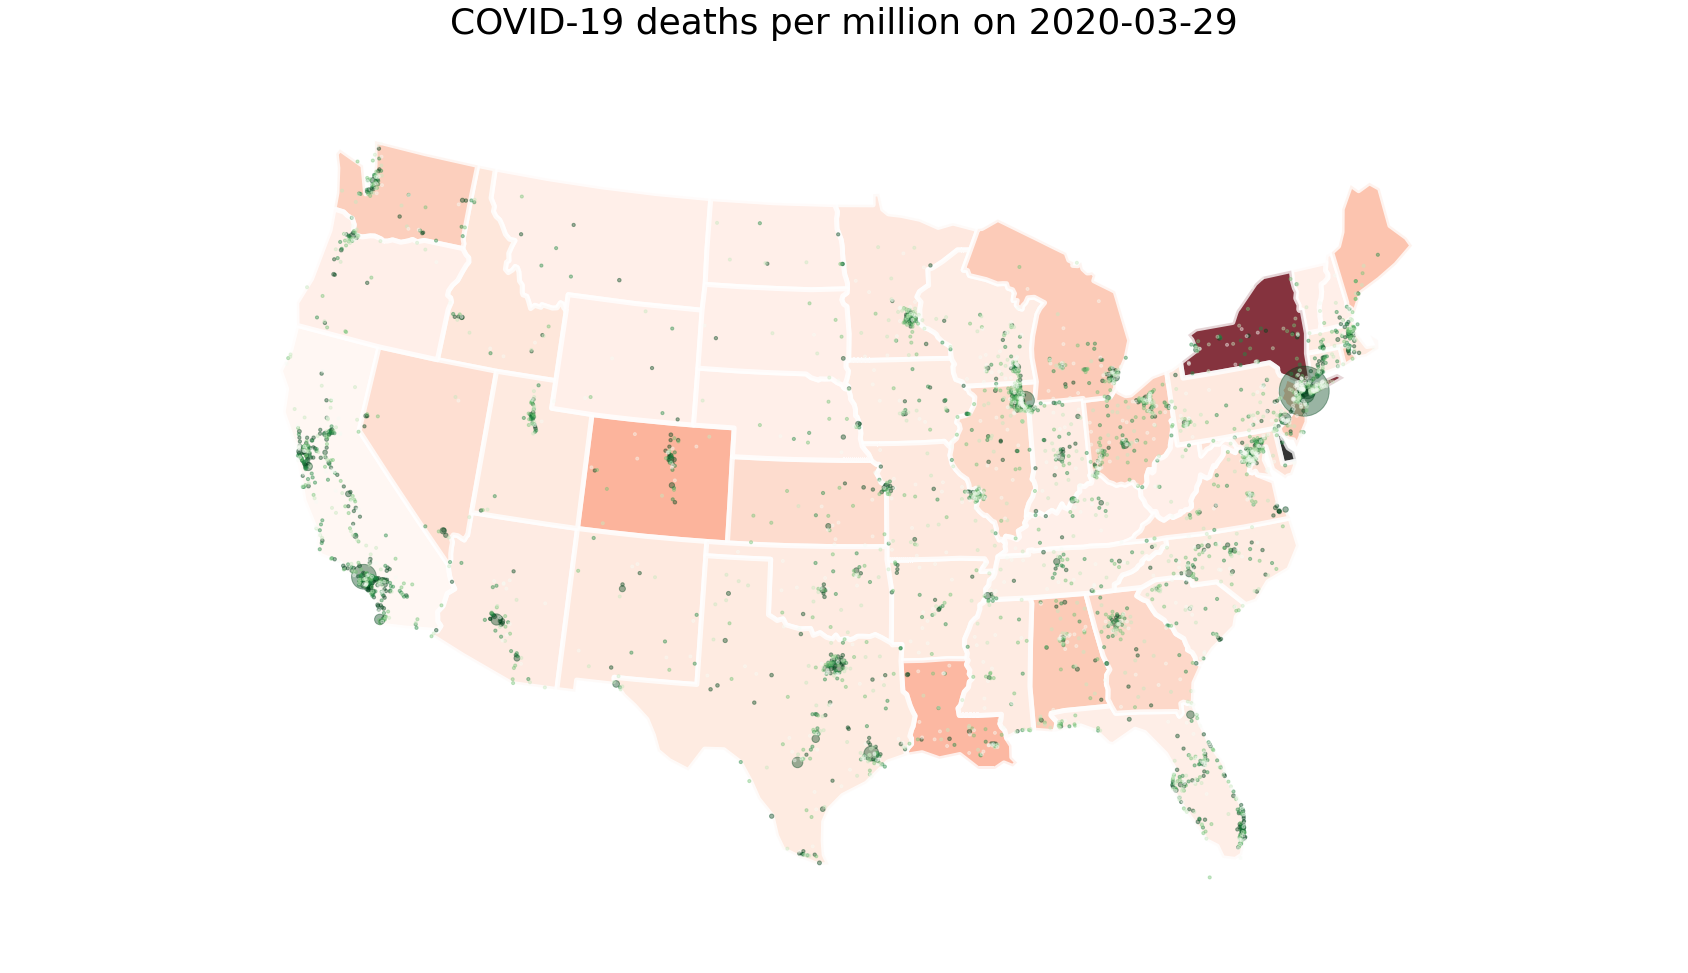

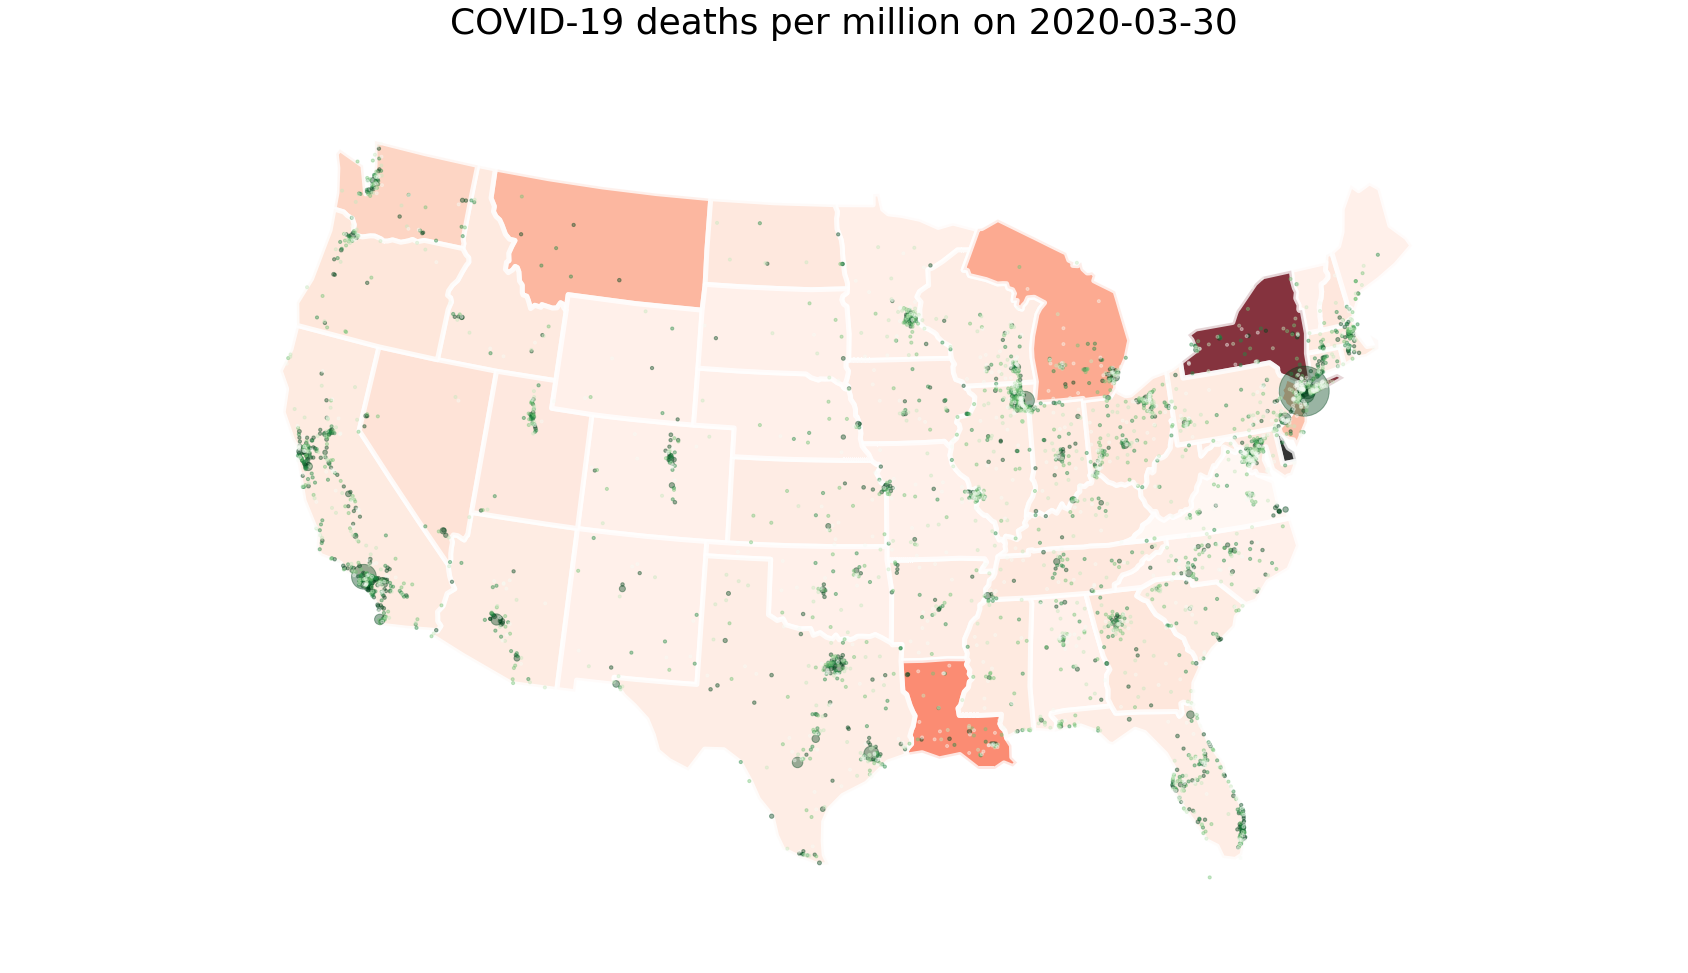

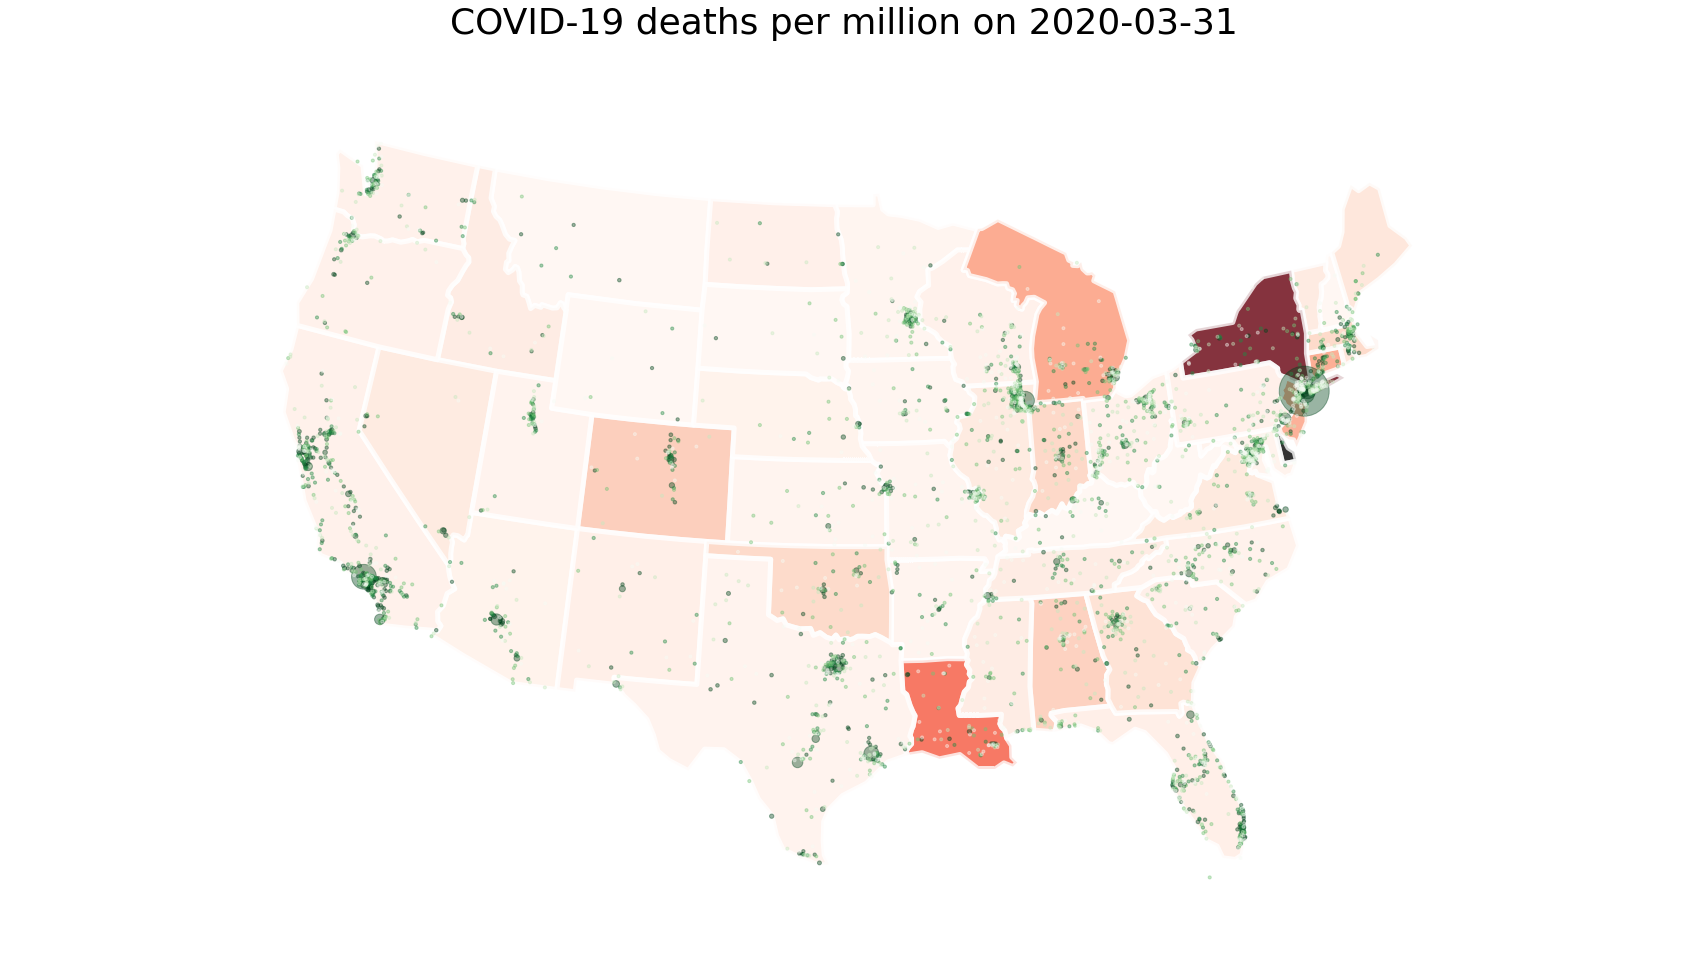

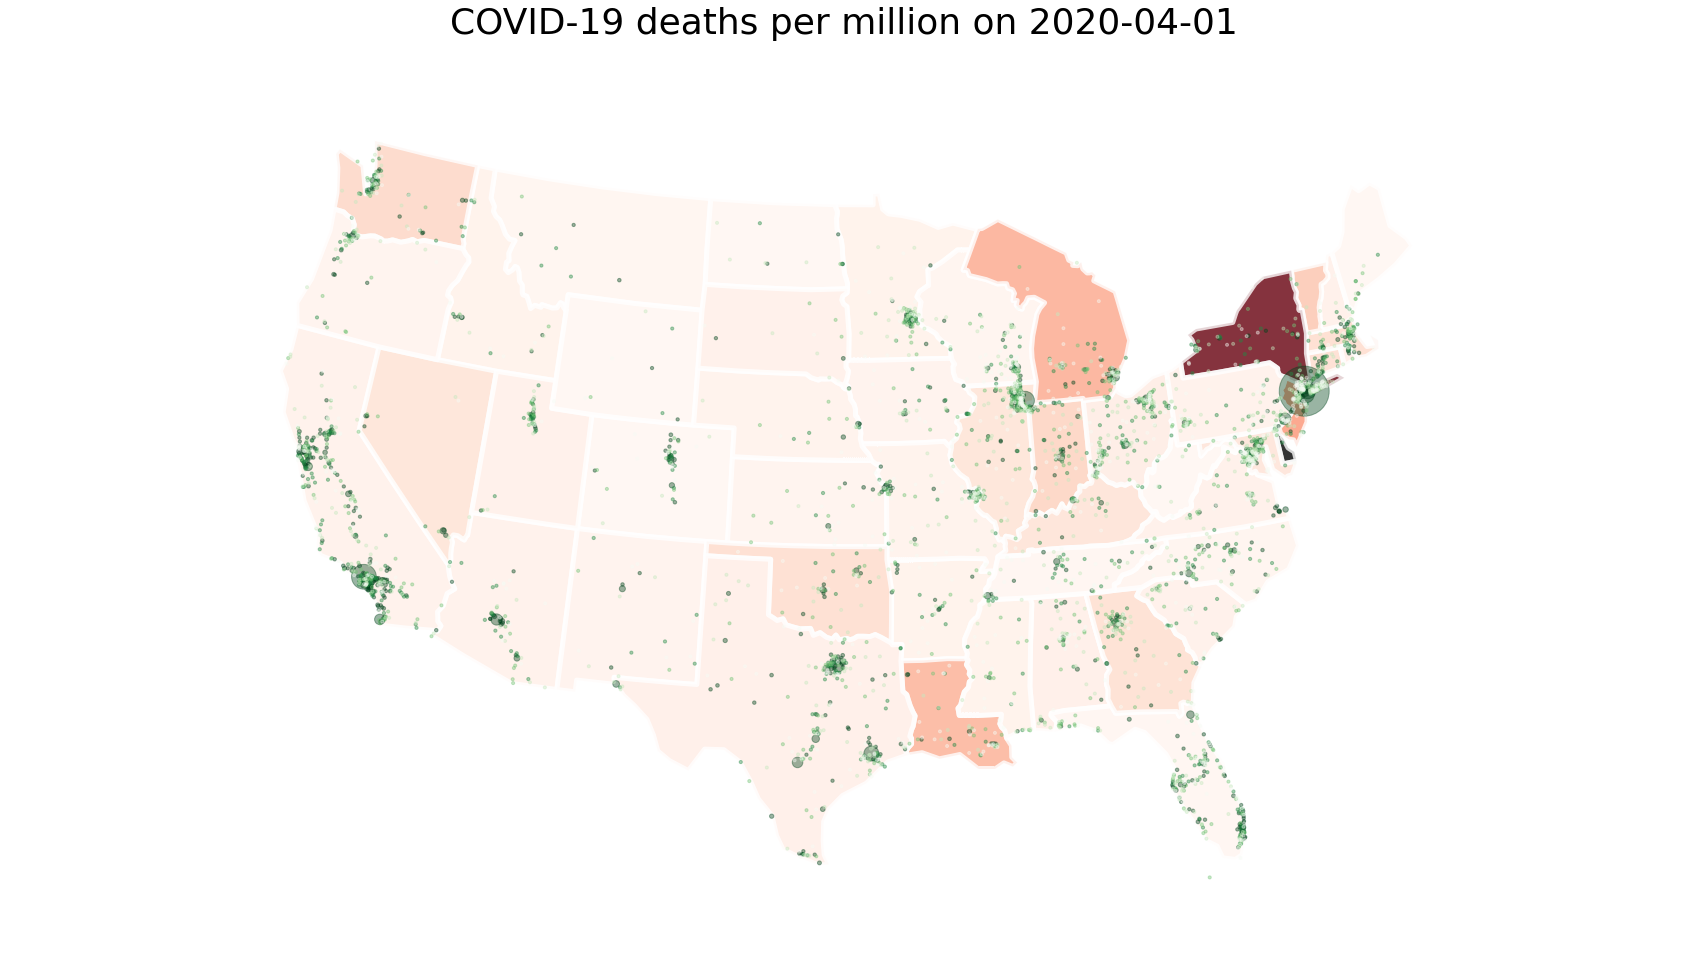

In [156]:

anim_path.mkdir(parents=True, exist_ok=True)
fig=plt.figure()
image_files=[]

for date in dates:
    is_earthday = ihme["date"]==date
    cv19 = lower_48.merge(ihme[is_earthday], left_on="state", right_on="location_name")
    deaths_per_mil = cv19["deaths_mean"] / cv19["population"] * 1000000.0
    cv19["deaths_per_mil"] = deaths_per_mil
    file_name = plot_choropleth(anim_path, date, cv19, lower_48_cities)
    image_files.append(file_name)

In [160]:
images = []

for file_name in image_files:
    images.append(imageio.imread(file_name))

gif_path = "movie.gif"
imageio.mimsave(gif_path, images, fps=2)